In [2]:

!pip install wikipedia

  Running setup.py bdist_wheel for wikipedia: started
  Running setup.py bdist_wheel for wikipedia: finished with status 'done'
  Stored in directory: C:\Users\dev\AppData\Local\pip\Cache\wheels\bf\87\25\df698dd7b66a42c1c5f3bd36f8155d4518d210f5e2c128b440
Successfully built wikipedia


In [4]:

from bs4 import BeautifulSoup as bs
import networkx as nx
import wikipedia

jung_digraph = nx.DiGraph()
jung_title = 'Carl Jung'
node_list = [jung_title]
jung_digraph.add_node(jung_title)
jung_page = wikipedia.page(jung_title)

def spider_infoboxes(jung_digraph, jung_page, updown='both'):
    jung_soup = bs(jung_page.html(), 'lxml')
    jung_title = jung_page.title
    for param_th in jung_soup.find_all('th', scope='row'):
        if (param_th.text.strip()=='Influences') and ((updown=='both') or (updown=='up')):
            influences_td = param_th.find_next_sibling('td')
            for influences_link in influences_td.find_all('a', title=True):
                influences_title = influences_link['title']
                if influences_title not in node_list:
                    jung_digraph.add_node(influences_title)
                jung_digraph.add_edge(influences_title, jung_title)
                if influences_title not in node_list:
                    influences_page = wikipedia.page(influences_title)
                    jung_digraph = spider_infoboxes(jung_digraph, influences_page, updown='up')
                    node_list.append(influences_title)
        if (param_th.text.strip()=='Influenced') and ((updown=='both') or (updown=='down')):
            influenced_td = param_th.find_next_sibling('td')
            for influenced_link in influenced_td.find_all('a', title=True):
                influenced_title = influenced_link['title']
                if influenced_title not in node_list:
                    jung_digraph.add_node(influenced_title)
                jung_digraph.add_edge(jung_title, influenced_title)
                if influenced_title not in node_list:
                    influenced_page = wikipedia.page(influenced_title)
                    jung_digraph = spider_infoboxes(jung_digraph, influenced_page, updown='down')
                    node_list.append(influenced_title)
    
    return jung_digraph

jung_digraph = spider_infoboxes(jung_digraph, jung_page)

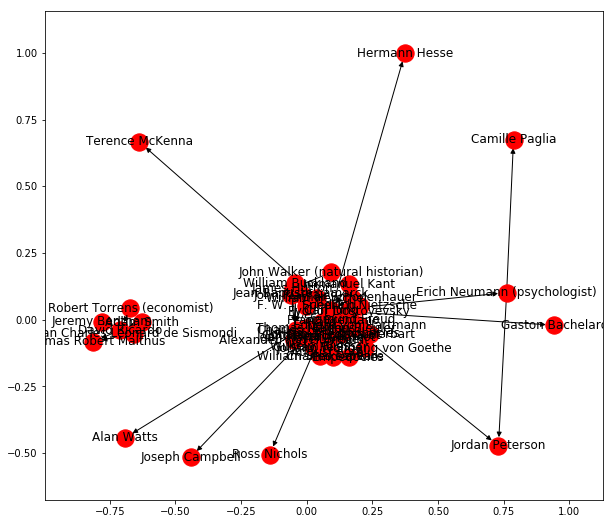

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(jung_digraph)

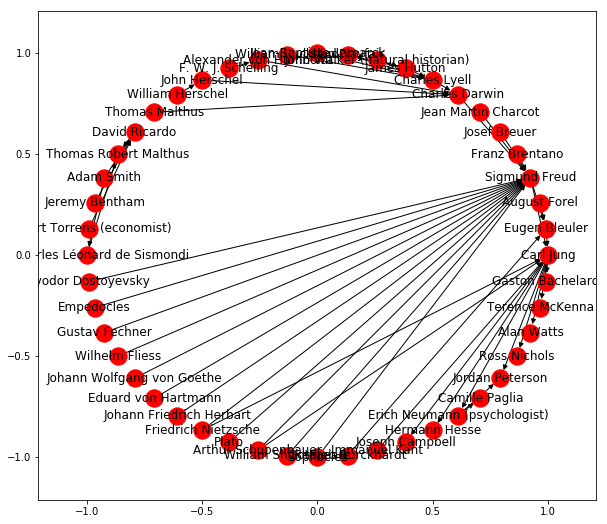

In [10]:

# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

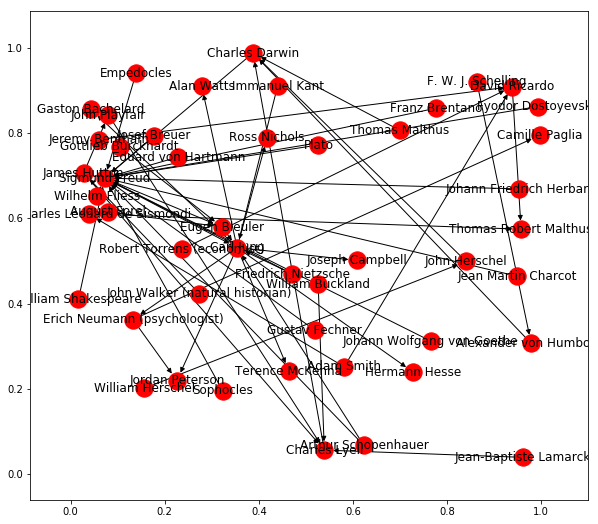

In [9]:

# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

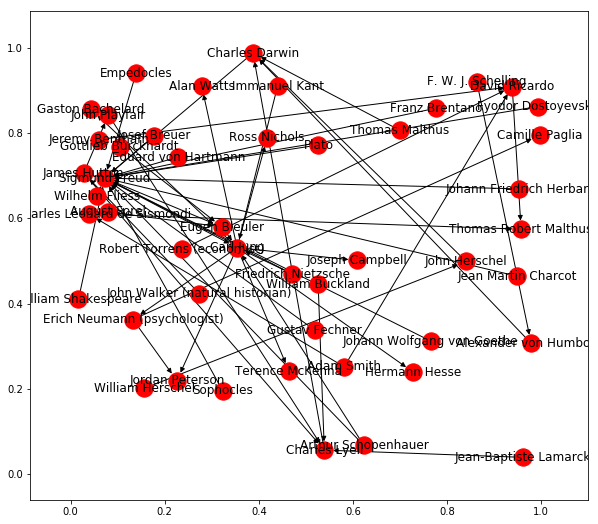

In [9]:

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(10,9))
pos = nx.kamada_kawai_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

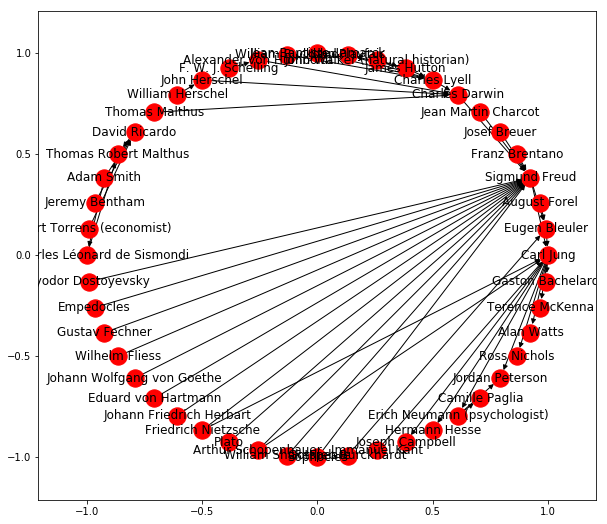

In [18]:

# Draw the graph using the shell layout
plt.figure(figsize=(10,9))
pos = nx.shell_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

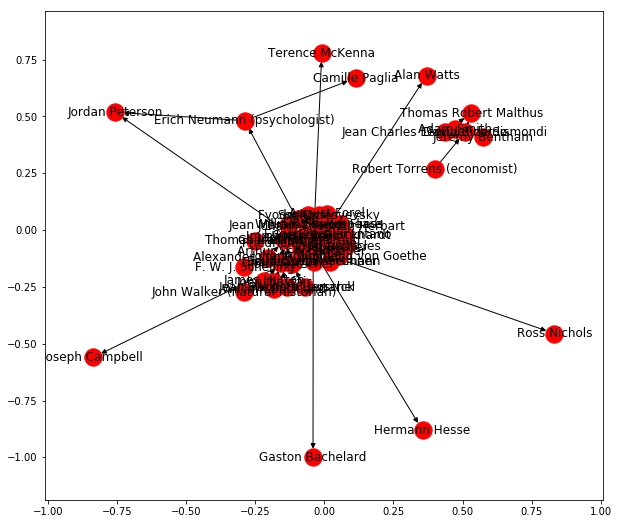

In [19]:

# Draw the graph using the spring layout
plt.figure(figsize=(10,9))
pos = nx.spring_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

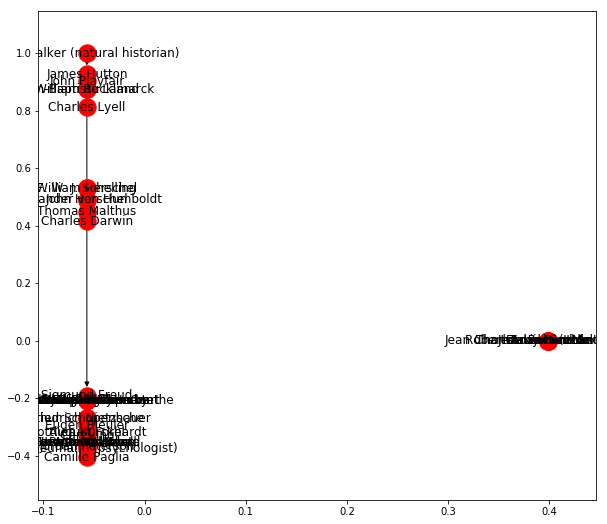

In [20]:

# Draw the graph using the spectral layout
plt.figure(figsize=(10,9))
pos = nx.spectral_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

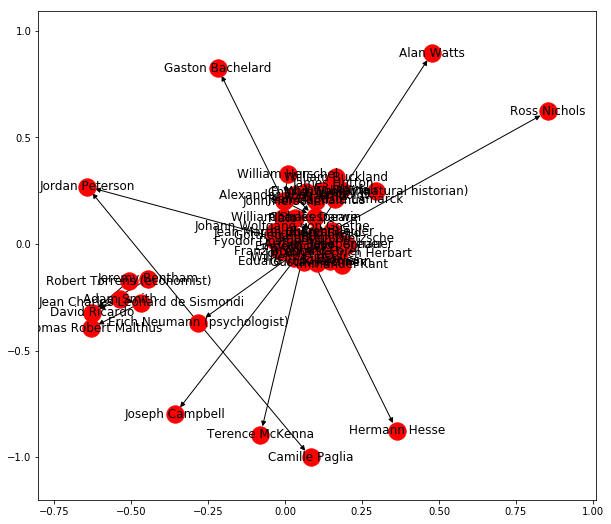

In [21]:

# Draw the graph using the fruchterman reingold layout
plt.figure(figsize=(10,9))
pos = nx.fruchterman_reingold_layout(jung_digraph)
nx.draw_networkx(jung_digraph, pos)

In [8]:

# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

In [15]:

import sys

# See what layouts are available in networkX
[getattr(nx, x)(jung_digraph) for x in nx.__dir__() if x.endswith('_layout')]

AttributeError: 'DiGraph' object has no attribute 'shape'

In [29]:

from networkx.utils import random_state
from networkx.drawing.layout import _process_params

@random_state(3)
def yob_layout(G, center=None, dim=2, random_state=None):
    import numpy as np

    G, center = _process_params(G, center, dim)
    shape = (len(G), dim)
    pos = random_state.rand(*shape) + center
    pos = pos.astype(np.float32)
    pos = dict(zip(G, pos))

    return pos

yob_layout(jung_digraph)

{'Adam Smith': array([0.35996678, 0.05863494], dtype=float32),
 'Alan Watts': array([0.13899614, 0.8654192 ], dtype=float32),
 'Alexander von Humboldt': array([0.64665514, 0.4245379 ], dtype=float32),
 'Arthur Schopenhauer': array([0.9967813 , 0.94974965], dtype=float32),
 'August Forel': array([0.21954705, 0.7812976 ], dtype=float32),
 'Camille Paglia': array([0.12305119, 0.4401183 ], dtype=float32),
 'Carl Jung': array([0.54547197, 0.7231551 ], dtype=float32),
 'Charles Darwin': array([0.991426  , 0.17819588], dtype=float32),
 'Charles Lyell': array([0.4975357 , 0.26803955], dtype=float32),
 'David Ricardo': array([0.9497374, 0.8761182], dtype=float32),
 'Eduard von Hartmann': array([0.00906244, 0.39477336], dtype=float32),
 'Empedocles': array([0.2247964, 0.6486134], dtype=float32),
 'Erich Neumann (psychologist)': array([0.8333553 , 0.06917982], dtype=float32),
 'Eugen Bleuler': array([0.70626855, 0.2532248 ], dtype=float32),
 'F. W. J. Schelling': array([0.6080173, 0.9625696], dty

In [32]:
# %load ../../load_magic/storage1.py

current_directory = !echo %cd%
folder_list = current_directory[0].split('\\')
%run ../../load_magic/storage2.py {len(folder_list) - folder_list.index('ipynb')}
%who

data_folder = ../data/
saves_folder = ../saves/
attempt_to_pickle	 bs	 current_directory	 data_folder	 encoding	 folder_list	 jung_digraph	 jung_page	 jung_title	 
load_csv	 load_dataframes	 load_object	 node_list	 nx	 os	 pd	 pickle	 plt	 
pos	 random_state	 save_dataframes	 saves_folder	 spider_infoboxes	 store_objects	 sys	 wikipedia	 yob_layout	 



In [43]:

store_objects(jung_digraph=jung_digraph)

In [51]:

import re
from random import randint
import numpy as np

node_list = [jung_title]
born_regex = re.compile(r'(\d{3,4}( BC)?)')
bc_regex = re.compile(r'(\d+) BC')
pos_dict = {}

def spider_infoboxes_4_born(jung_page, updown='both'):
    jung_soup = bs(jung_page.html(), 'lxml')
    jung_title = jung_page.title
    for param_th in jung_soup.find_all('th', scope='row'):
        if (param_th.text.strip()=='Baptised') or (param_th.text.strip()=='Born'):
            born_td = param_th.find_next_sibling('td')
            born_list = born_regex.findall(born_td.text)
            if len(born_list) > 0:
                born_year = max(born_list, key=lambda x: len(x[0]))[0]
                born_year = int(bc_regex.sub(r'-\1', born_year))
                born_pos = np.array((born_year, randint(1, 10)))
                born_pos = born_pos.astype(np.float32)
                pos_dict[jung_title] = born_pos
        elif (param_th.text.strip()=='Influences') and ((updown=='both') or (updown=='up')):
            influences_td = param_th.find_next_sibling('td')
            for influences_link in influences_td.find_all('a', title=True):
                influences_title = influences_link['title']
                if influences_title not in node_list:
                    influences_page = wikipedia.page(influences_title)
                    spider_infoboxes_4_born(influences_page, updown='up')
                    node_list.append(influences_title)
        elif (param_th.text.strip()=='Influenced') and ((updown=='both') or (updown=='down')):
            influenced_td = param_th.find_next_sibling('td')
            for influenced_link in influenced_td.find_all('a', title=True):
                influenced_title = influenced_link['title']
                if influenced_title not in node_list:
                    influenced_page = wikipedia.page(influenced_title)
                    spider_infoboxes_4_born(influenced_page, updown='down')
                    node_list.append(influenced_title)

spider_infoboxes_4_born(jung_page)

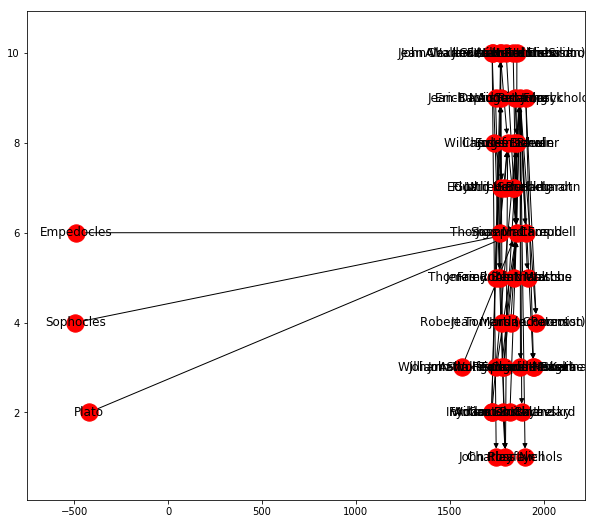

In [58]:

# Draw the graph using the birth-year-based layout
pos_dict = load_object('pos_dict')
#pos_dict['August Forel'] = np.array((1848, randint(1, 10))).astype(np.float32)
#pos_dict['Jean Martin Charcot'] = np.array((1825, randint(1, 10))).astype(np.float32)
#pos_dict['F. W. J. Schelling'] = np.array((1775, randint(1, 10))).astype(np.float32)
#pos_dict['Thomas Malthus'] = np.array((1766, randint(1, 10))).astype(np.float32)
pos_dict['Eduard von Hartmann'] = np.array((1842, randint(1, 10))).astype(np.float32)
store_objects(pos_dict=pos_dict)
plt.figure(figsize=(10,9))
jung_digraph = load_object('jung_digraph')
nx.draw_networkx(jung_digraph, pos_dict)